The purpose of this notebook is to explore the effect of using only an LSTM to predict bikeshare availability. Results show that although under some cases it demonstrates an ability to predict hourly bike availability throughout the day,
this ability is not consistent across all stations.

In [ ]:
import json
import pandas as pd
import requests
import zipfile
import io
from io import BytesIO
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# open this folder and add to shortcut https://drive.google.com/drive/folders/15J0TrAl6luJlbUcrW22-ca8oUpx1v4Ru?usp=sharing
%cd <path to bikeshare_availability_prediction folder>
# example:
# %cd /content/drive/.shortcut-targets-by-id/1eHfo448LIm58sxpXztXwS5IHIe6Skl_A/ECE1724_Project/Final/FinalSubmission/ece1724FinalColabNotebooks/bikeshare_availability_prediction

/content/drive/.shortcut-targets-by-id/1eHfo448LIm58sxpXztXwS5IHIe6Skl_A/ECE1724_Project/Final/FinalSubmission/ece1724FinalColabNotebooks/bikeshare_availability_prediction


# Load Data

In [ ]:
df=pd.read_csv('./dataset/bikeshare_availability_dataset.csv')

df

,station_id,lat,lon,Time,Hour,capacity,bikes_available
0,7000,43.639832,-79.395954,2023-03-01 00:00:00,0,35,18.0
1,7000,43.639832,-79.395954,2023-03-01 01:00:00,1,35,18.0
2,7000,43.639832,-79.395954,2023-03-01 02:00:00,2,35,18.0
3,7000,43.639832,-79.395954,2023-03-01 03:00:00,3,35,18.0
4,7000,43.639832,-79.395954,2023-03-01 04:00:00,4,35,18.0
...,...,...,...,...,...,...,...
477643,7772,43.647508,-79.386044,2023-03-31 19:00:00,19,15,10.0
477644,7772,43.647508,-79.386044,2023-03-31 20:00:00,20,15,8.0
477645,7772,43.647508,-79.386044,2023-03-31 21:00:00,21,15,8.0
477646,7772,43.647508,-79.386044,2023-03-31 22:00:00,22,15,6.0


In [ ]:
#Add a new column by dividing column1 by column2
df['availability'] = df['bikes_available'] / df['capacity']

In [ ]:
example=df[df['station_id']==7001]

# oct 2022 data

In [ ]:

'''
df=pd.read_csv('./dataset/oct2022_data.csv')
example=df[df['station_id']==7003]
example=example.iloc[10:418]
'''

In [ ]:
from sklearn.model_selection import train_test_split
# Calculate the number of rows for training, testing, and validation
train_rows = 13 * 24
test_rows = valid_rows = 2 * 24

# Split the data into training, testing, and validation sets
train_data, test_valid_data = train_test_split(example, train_size=train_rows, shuffle=False)
test_data, valid_data = train_test_split(test_valid_data, test_size=test_rows, shuffle=False)

# Print the lengths of the resulting sets
print("Train length:", len(train_data))
print("Test length:", len(test_data))
print("Validation length:", len(valid_data))

Train length: 312
Test length: 48
Validation length: 48


In [ ]:
train_data=train_data.reset_index()
test_data=test_data.reset_index()
valid_data=valid_data.reset_index()

In [ ]:
train_data.head(n=24)

,index,last_reported,station_id,name,address,lat,lon,num_bikes_available,num_docks_available,availability
0,6222,2022-10-11 00:00:00-04:00,7003,Madison Ave / Bloor St W,Madison Ave / Bloor St W,43.667158,-79.402761,9.50,5.50,0.633333
1,6844,2022-10-11 01:00:00-04:00,7003,Madison Ave / Bloor St W,Madison Ave / Bloor St W,43.667158,-79.402761,10.00,5.00,0.666667
2,7465,2022-10-11 02:00:00-04:00,7003,Madison Ave / Bloor St W,Madison Ave / Bloor St W,43.667158,-79.402761,10.00,5.00,0.666667
3,8087,2022-10-11 03:00:00-04:00,7003,Madison Ave / Bloor St W,Madison Ave / Bloor St W,43.667158,-79.402761,10.00,5.00,0.666667
4,8709,2022-10-11 04:00:00-04:00,7003,Madison Ave / Bloor St W,Madison Ave / Bloor St W,43.667158,-79.402761,10.00,5.00,0.666667
5,9331,2022-10-11 05:00:00-04:00,7003,Madison Ave / Bloor St W,Madison Ave / Bloor St W,43.667158,-79.402761,10.00,5.00,0.666667
6,9953,2022-10-11 06:00:00-04:00,7003,Madison Ave / Bloor St W,Madison Ave / Bloor St W,43.667158,-79.402761,10.00,5.00,0.666667
7,10574,2022-10-11 07:00:00-04:00,7003,Madison Ave / Bloor St W,Madison Ave / Bloor St W,43.667158,-79.402761,10.00,5.00,0.666667
8,11196,2022-10-11 08:00:00-04:00,7003,Madison Ave / Bloor St W,Madison Ave / Bloor St W,43.667158,-79.402761,12.50,2.50,0.833333
9,11817,2022-10-11 09:00:00-04:00,7003,Madison Ave / Bloor St W,Madison Ave / Bloor St W,43.667158,-79.402761,13.00,2.00,0.866667


#LSTM Model to make Time-Series Prediction for a station

In [ ]:
import torch
from torch.utils.data import Dataset
import pandas as pd

class CustomTimeSeriesDataset(Dataset):
    def __init__(self, dataframe, sequence_length=24, days=31, n_hist=4,n_pred=1,target_column='target_column'):
        self.dataframe = dataframe
        self.sequence_length = sequence_length
        self.n_pred=n_pred
        self.n_hist=n_hist
        self.days=days
        self.n_windows=sequence_length-(n_hist+n_pred)-1
        self.input=[]
        self.output=[]

        for i in range(days):
          for j in range(self.n_windows):
            self.input.append(self.dataframe.loc[j*(i+1):j*(i+1)+n_hist-1,target_column].values)
            self.output.append(self.dataframe.loc[j*(i+1)+n_hist,target_column])

    def __len__(self):
        return len(self.input)

    def __getitem__(self, idx):

        # Extract the input sequence
        input_sequence = torch.tensor(self.input[idx], dtype=torch.float32)

        # Extract the output sequence
        target_value = torch.tensor(self.output[idx], dtype=torch.float32)

        return input_sequence, target_value


In [ ]:
# Assuming df is your DataFrame
target_column='availability'
train_dataset = CustomTimeSeriesDataset(dataframe=train_data, sequence_length=24, days=13, n_hist=4,n_pred=1,target_column=target_column)
valid_dataset = CustomTimeSeriesDataset(dataframe=valid_data, sequence_length=24, days=2, n_hist=4,n_pred=1,target_column=target_column)
test_dataset = CustomTimeSeriesDataset(dataframe=test_data, sequence_length=24, days=2, n_hist=4,n_pred=1,target_column=target_column)

In [ ]:
from torch.utils.data import DataLoader

batch_size=1
train_dataloader = DataLoader(dataset=train_dataset,batch_size=batch_size)

valid_dataloader = DataLoader(dataset=valid_dataset,batch_size=batch_size)

test_dataloader = DataLoader(dataset=test_dataset,batch_size=batch_size)


In [ ]:
input,output=next(iter(train_dataloader))
print(input.shape)
print(output.shape)


torch.Size([1, 4])
torch.Size([1])


In [ ]:
len(train_dataloader)

234

In [ ]:
import torch
import torch.nn as nn

class TwoLayerLSTM(nn.Module):
    def __init__(self, input_size, hidden_size,hidden_size2, output_size, num_layers=2):
        super(TwoLayerLSTM, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=1, batch_first=True)
        for name, param in self.lstm1.named_parameters():
            if 'bias' in name:
                torch.nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                torch.nn.init.xavier_uniform_(param)
        self.lstm2 = nn.LSTM(hidden_size, hidden_size2, num_layers=num_layers-1, batch_first=True)
        for name, param in self.lstm1.named_parameters():
            if 'bias' in name:
                torch.nn.init.constant_(param, 0.0)
            elif 'weight' in name:
                torch.nn.init.xavier_uniform_(param)
        self.fc = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        # Initialize hidden states
        h0 = torch.zeros(self.lstm1.num_layers, x.size(0), self.lstm1.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm1.num_layers, x.size(0), self.lstm1.hidden_size).to(x.device)

        # Forward pass through the first LSTM layer
        out1, _ = self.lstm1(x, (h0, c0))

        # Forward pass through the second LSTM layer
        out2, _ = self.lstm2(out1)

        # Only take the output from the last time step
        out = out2[:, -1, :]

        # Fully connected layer
        out = self.fc(out)

        return out

# Example usage:
# Assuming input_size=features, hidden_size=number of hidden units, output_size=1
input_size = 1
hidden_size = 32
hidden_size2=128
output_size = 1

# Create an instance of the model
model = TwoLayerLSTM(input_size, hidden_size,hidden_size2, output_size)

# Create a sample input sequence with a batch size of 3
sample_input = torch.randn(3, 4, input_size)  # Batch size of 3, sequence length of 4

# Forward pass through the model
output = model(sample_input)

# Print the output shape
print("Input shape:", sample_input.shape)
print("Output shape:", output.shape)


Input shape: torch.Size([3, 4, 1])
Output shape: torch.Size([3, 1])


In [ ]:
def evaluate(data_loader,model,criterion,optimizer):
    # Evaluate
    model.eval()
    total_loss = 0
    correct_train = 0
    total_train = 0
    total_diff=0
    with torch.no_grad():
      for batch_source, batch_target in data_loader:
          optimizer.zero_grad()
          batch_source=batch_source.unsqueeze(2)
          output = model(batch_source)
          loss = criterion(output, batch_target)

          pred_np = output.detach().numpy()
          actual_np = batch_target.detach().numpy()

          # Calculate the absolute difference
          abs_diff = np.abs(pred_np - actual_np)
          total_loss += loss.item()
          #total_diff += abs_diff

          # print(loss.item())
      average_loss = total_loss/len(data_loader)
      # average_diff = total_diff/len(data_loader)
    return  average_loss


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Hyperparameters

learning_rate = 3e-5
num_epochs = 200
weight_decay = 5e-5

# Initialize the model, loss function, and optimizer
input_size = 1
hidden_size = 32
hidden_size2=128
output_size = 1

# Create an instance of the model
model = TwoLayerLSTM(input_size, hidden_size,hidden_size2, output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate,weight_decay=weight_decay)


for epoch in range(num_epochs):
    # Training
    model=model
    model.train()
    total_loss = 0
    correct_train = 0
    total_train = 0
    total_diff=0

    for batch_source, batch_target in train_dataloader:
        optimizer.zero_grad()
        batch_source=batch_source.unsqueeze(2)
        output = model(batch_source)
        # print(output.shape)
        # print(batch_target.shape)
        loss = criterion(output, batch_target)
        loss.backward()
        optimizer.step()
        pred_np = output.detach().numpy()
        actual_np = batch_target.detach().numpy()

        # Calculate the absolute difference
        abs_diff = np.abs(pred_np - actual_np)
        total_loss += loss.item()
        #total_diff += abs_diff
    valid_average_loss=evaluate(valid_dataloader,model,criterion,optimizer)
        # print(loss.item())
    train_average_loss = total_loss/len(train_dataloader)
    #train_average_diff = total_diff/len(train_dataloader)
    if (epoch + 1) % 10 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}]', f'Training Loss: {train_average_loss:.4f}',f'Validation Loss: {valid_average_loss:.4f}')
      #print(train_average_diff)
      #print(valid_average_diff)
torch.save(model, 'model.pth')

Epoch [10/200] Training Loss: 0.0408 Validation Loss: 0.0718
Epoch [20/200] Training Loss: 0.0334 Validation Loss: 0.0359
Epoch [30/200] Training Loss: 0.0316 Validation Loss: 0.0278
Epoch [40/200] Training Loss: 0.0304 Validation Loss: 0.0261
Epoch [50/200] Training Loss: 0.0291 Validation Loss: 0.0253
Epoch [60/200] Training Loss: 0.0276 Validation Loss: 0.0248
Epoch [70/200] Training Loss: 0.0258 Validation Loss: 0.0242
Epoch [80/200] Training Loss: 0.0237 Validation Loss: 0.0238
Epoch [90/200] Training Loss: 0.0210 Validation Loss: 0.0236
Epoch [100/200] Training Loss: 0.0180 Validation Loss: 0.0238
Epoch [110/200] Training Loss: 0.0154 Validation Loss: 0.0238
Epoch [120/200] Training Loss: 0.0140 Validation Loss: 0.0236
Epoch [130/200] Training Loss: 0.0134 Validation Loss: 0.0234
Epoch [140/200] Training Loss: 0.0129 Validation Loss: 0.0234
Epoch [150/200] Training Loss: 0.0126 Validation Loss: 0.0233
Epoch [160/200] Training Loss: 0.0123 Validation Loss: 0.0231
Epoch [170/200] T

In [ ]:
model = torch.load('model.pth')

In [ ]:
import matplotlib.pyplot as plt
def plot_prediction(model,batch_source, batch_target):
    model.eval()
    total_loss = 0
    correct_train = 0
    total_train = 0
    total_diff=0
    with torch.no_grad():
        optimizer.zero_grad()
        batch_source=batch_source.unsqueeze(2)
        output = model(batch_source)
        loss = criterion(output, batch_target)
        pred_np = output.detach().numpy()
        actual_np = batch_target.detach().numpy()
        # print(pred_np.squeeze())
        # print(actual_np.squeeze())

        # plt.plot(pred_np.squeeze())
        # plt.plot(actual_np.squeeze())
        # plt.show()
    return pred_np.squeeze(),actual_np.squeeze()


In [ ]:
pred=[]
actual=[]

# Results

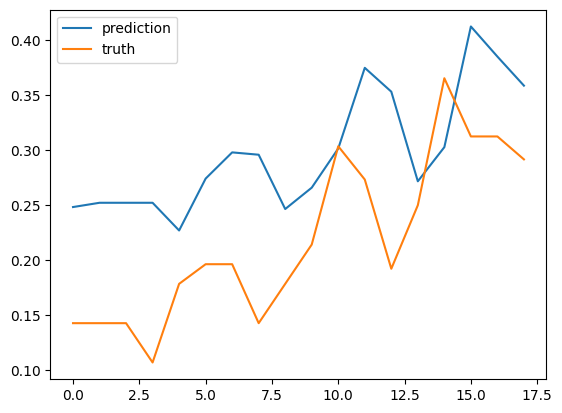

In [ ]:
for batch_source, batch_target in test_dataloader:

  pred_np,actual_np=plot_prediction(model,batch_source, batch_target)
  pred.append(pred_np)
  actual.append(actual_np)

plt.plot(pred[:18],label='prediction')
plt.plot(actual[:18],label='truth')
plt.legend()
plt.show()

